In [6]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics,model_selection
from skimage import io
import skimage
from natsort import natsorted, ns

In [7]:
### Загружаю и преобразую изображения и метки классов в numpy.array. Выглядит так себе, надо было сначала загрузить сюда, поделить
### SKlearnом на train_test и потом экспортировать в папки, но я решил не исправлять

In [8]:
train_image_list = None
test_image_list = None
for class_ in ['Opened','Closed']:
    train_path = r'C:\Users\stepan\PycharmProjects\Test_task\EyesDataset\{0}\Train'.format(class_)
    train_list_files = natsorted(os.listdir(train_path))
    if train_image_list is None:
        train_image_list = []
    for filename in train_list_files:
        train_image_list.append(io.imread(train_path + '\\' + filename).flatten())
    if class_ == 'Opened':
        train_label_list = [1]*len(train_image_list)
    else:
        train_label_list += [0]*(len(train_image_list)-len(train_label_list))
train_label_list = np.array(train_label_list)
train_image_list = np.array(train_image_list)


for class_ in ['Opened','Closed']:
    test_path = r'C:\Users\stepan\PycharmProjects\Test_task\EyesDataset\{0}\Test'.format(class_)
    test_list_files = natsorted(os.listdir(test_path))
    if test_image_list is None:
        test_image_list = []
    for filename in test_list_files:
        test_image_list.append(io.imread(test_path + '\\' + filename).flatten())
    if class_ == 'Opened':
        test_label_list = [1]*len(test_image_list)
    else:
        test_label_list += [0]*(len(test_image_list)-len(test_label_list))
test_label_list = np.array(test_label_list)
test_image_list = np.array(test_image_list)

In [9]:
### Нормализую, вычитая среднее и деля на дисперсию каждого столбца. Можно было бы использовать StandartScaler и встроить
###   в пайплайн, тогда бы не надо было бы делать то же самое с тестом, но я решил сделать это руками.

In [10]:
print(train_image_list.mean(),train_image_list.std())
images_mean = train_image_list.mean(axis = 0)
images_std = train_image_list.std(axis = 0)
train_image_list = np.array(list(map(lambda x: (x-images_mean)/images_std,train_image_list)))
test_image_list = np.array(list(map(lambda x: (x-images_mean)/images_std,test_image_list)))

131.7035290006988 50.248646383258794


In [508]:
### Инициализирую и учу случайный лес с базовыми гиперпараметрами
Baseline100 = RandomForestClassifier()
Baseline100.fit(train_image_list, train_label_list)

RandomForestClassifier()

In [509]:
### Смотрим качество на тестовых глазах

In [510]:
predict = Baseline100.predict(test_image_list)
predict_proba = Baseline100.predict_proba(test_image_list)
print(metrics.accuracy_score(test_label_list,predict))
print(metrics.roc_auc_score(test_label_list,predict_proba[:,1]))

0.8018867924528302
0.8748665005339978


In [241]:
### Получается чуть лучше чем случайно, надо добавить данных и попробовать подобрать гиперпараметры

In [537]:
Baseline500 = RandomForestClassifier(max_depth = 5, n_estimators = 150)
Baseline500.fit(train_image_list, train_label_list)
predict = Baseline500.predict(test_image_list)
predict_proba = Baseline500.predict_proba(test_image_list)
print(metrics.accuracy_score(test_label_list,predict))
print(metrics.roc_auc_score(test_label_list,predict_proba[:,1]))

[1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.8018867924528302
0.8750444998220006


In [ ]:
### При добавлении ещё 400 изображений AUC почти не вырос и скачет около 87-89 и Accuracy при этом около 80, 
###   чуть лучше, но все ещё неприемлемо.
### Посмотрим пример на котором модель ломается

[0.51981148 0.48018852]


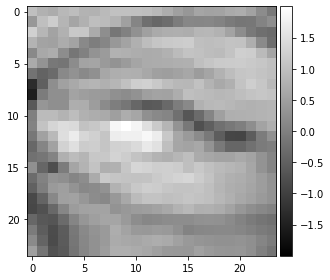

In [542]:
print(predict_proba[6])
io.imshow((test_image_list[6]).reshape(24,24),cmap = 'gray')

In [ ]:
### Ломается на неочевидной картинке и это хорошо. Надо попробовать поподбирать гиперпараметры.

In [533]:
print(train_image_list)

[[-0.22837129 -0.65153396 -1.10216187 ... -0.55742132 -0.5309934
  -0.50212064]
 [ 1.36502432  1.06503495  0.67969689 ... -1.03936797 -1.16105273
  -1.08337116]
 [-0.43265277 -0.5481262  -0.68777611 ... -0.17186399 -0.26442984
  -0.33258923]
 ...
 [-0.51436537 -0.87903105 -1.10216187 ... -0.38873999 -0.45829425
  -0.55055818]
 [ 0.42532947  0.25845438  0.01667968 ...  0.09320666 -0.02209932
  -0.06618274]
 [ 0.11890724  0.09300195  0.18243398 ...  0.40647199  0.4140956
   0.44241146]]


In [528]:
parameters_grid = {
    'n_estimators' : [30,70,100,150,200],
    'max_depth' : [5,10,15],
}
cv_strategy = model_selection.StratifiedShuffleSplit(train_label_list,n_splits = 10, test_size = 0.4, random_state = 17) 

In [538]:
grid_cv = model_selection.GridSearchCV(Baseline500,parameters_grid,scoring = 'roc_auc')
grid_cv.fit(test_image_list,test_label_list)
print(grid_cv.best_params_)

{'max_depth': 15, 'n_estimators': 100}


In [541]:
Baseline500 = RandomForestClassifier(max_depth = 5, n_estimators = 150)
Baseline500.fit(train_image_list, train_label_list)
print("Accuracy:  ", metrics.accuracy_score(test_label_list,predict))
print("AUC:  ",metrics.roc_auc_score(test_label_list,predict_proba[:,1]))

Accuracy:   0.8018867924528302
AUC:   0.8750444998220006


In [540]:
### Добиться улучшения не получилось и кажется больше нет смысла пытаться улучшить эту модель,
###   просто не способен выявить пространственную связь между пикселями и просто выбирает зоны, где в среднем находятся 
###   белок глаза, линия век и по этой информации делает решение.
### Финальные метрики не нейросетевого решения : 
###    AUC - 0.875,Accuracy - 0.80